# Ames Housing Data - Preprocessing


## Executive Summary
---
When it comes to searching for new house, ask a home buyer to describe their dream house, and they probably won't begin with, rather or not if the garage is attached to the house or the square feet of second floor. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, I will use different methods in machine learning and select the one that can produce the most accurate prediction.

## Problem Statement:
So what are the features that actually impact the housing price the most in Ames, Iowa? 

### Contents:
- [Data Clearning](#Data-cleaning%3A-Initial)
- [Fixing Null Values](#Fixing-Null-Values)
- [Set up X and Y](#Set-up-<code>X<%2Fcode>-and-<code>y<%2Fcode>)
- [Create training and validation sets the data](#Create-training-and-validation-sets-the-data)
- [Manual Feature Selection](#Manual-Feature-Selection)
---


### Importing libaries




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectPercentile, SelectFromModel, f_regression, RFECV
import sklearn.linear_model as linear_model
import pickle
import csv

%matplotlib inline

### Import Data into DataFrame



In [2]:
df = pd.read_csv('../datasets/train.csv', index_col='Id')
df_test = pd.read_csv('../datasets/test.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Data cleaning: Initial
---

In [3]:
df['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [4]:
# Checking the types of data we're dealing with
df.dtypes

PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [5]:
# rename columns with lower case and replace space with _ so it's easier for me to work with
df.columns = [i.lower().replace(' ','_') for i in df.columns]
df.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
# calling out all the colums that have null value
df.isnull().sum()[df.isnull().sum()>0]

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

## What to do with the Null Value
---
- **DROP Lot Frontage (Continuous): Linear feet of street connected to property**
    - **null meaning there's 0 linear feet of street connected to property**
    - **will drop**
---
- **DROP Alley (Nominal): Type of alley access to property**
    - **null meaning no alley access**
    - **changing null to None; however, does not apply to SalePrice. Will Drop**
---
- Mas Vnr Type (Nominal): Masonry veneer type
    - null meaning None
    - changing null to None
- Mas Vnr Area (Continuous): Masonry veneer area in square feet
    - nulls are the missing values 
    - going to replace to 0.0
- Bsmt Qual (Ordinal): Evaluates the height of the basement
    - null meaning no basement
    - replace null with NA
- Bsmt Cond (Ordinal): Evaluates the general condition of the basement
    - null emaning no basement
    - replace null with NA
- Bsmt Exposure (Ordinal): Refers to walkout or garden level walls
    - null meaning no basement
    - replace null with NA
- BsmtFin Type 1 (Ordinal): Rating of basement finished area
    - null meaning no basement
    - replace null with NA
- BsmtFin SF 1 (Continuous): Type 1 finished square feet
    - only have 1 null value, missing data
    - replace null with 0.0
- BsmtFinType 2 (Ordinal): Rating of basement finished area (if multiple types)
    - null meaning no basement
    - replace null with NA
- BsmtFin SF 2 (Continuous): Type 2 finished square feet
    - null meaning no basement to measure the square feet (only have one null value)
    - replace null with 0.0
---
- **DROP-ROW Bsmt Unf SF (Continuous): Unfinished square feet of basement area**
    - **null meaning no basement and only have one null value**
    - **can't replace with 0.0 due to that meaning it has a completed basement; therefore dropping this row**
---
- Total Bsmt SF (Continuous): Total square feet of basement area
    - only one house have null value
    - will replace null with 0.0
- Bsmt Full Bath (Discrete): Basement full bathrooms
    - only 2 null values 
    - replace nulll with 0.0
- Bsmt Half Bath (Discrete): Basement half bathrooms
    - only 2 null values
    - replace null with 0.0
- FireplaceQu (Ordinal): Fireplace quality
    - null meaning no fire place
    - replacen null with NA
- Garage Type (Garage location)
    - null meaning no garage
    - replace null with NA
---
- **DROP Garage Yr Blt (Year garage was built)**
    - **null meaning either no garage, or missing data**
    - **this doesn't seem to have correlation with SalePrice, therefore will drop**
---
- Garage Finish
    - 113 houses with no garage as seen above
    - and one house with no record of finish
- Garage Cars (Size of garage in car capacity)
    - only one null meaning no garage
    - will replace null with 0.0
- Garage Area
    - only one null meaning no garage
    - will replace null with 0.0
- Garage Qual (Garage quality)
    - null meaning no garage
    - will replace with NA
- Garage Cond (Garage condition)
    - null might be missing data
    - replace null with NA for now
- Pool QC (Pool quality)
    - null meaning no pool
- Fence (Fence quality)
    - null meaning property have no fence, replace null with 0.0
---
- **DROP Misc Feature (Miscellaneous feature not covered in other categories)**
    - **will drop**
---

## Fixing Null Values

In [7]:
# replace null values with interprtation from above
df.fillna(value={'mas_vnr_type': 'None','bsmt_qual': 'NA','bsmt_cond': 'NA','bsmt_exposure': 'NA','bsmtfin_type_1': 'NA',
                 'bsmtfin_type_2': 'NA','fireplace_qu': 'NA','garage_type': 'NA','garage_finish': 'NA','garage_qual': 'NA','garage_cond': 'NA',
                 'paved_drive': 'NA', 'mas_vnr_area': 0.0,'bsmtfin_sf_1': 0.0,'bsmtfin_sf_2': 0.0,'total_bsmt_sf': 0.0,'bsmt_full_bath': 0.0,
                 'bsmt_half_bath': 0.0, 'garage_cars': 0.0, 'garage_area': 0.0, 'fence': 0.0,'pool_qc':'NA'}, axis=0, inplace=True)

In [8]:
# dropping the columns that won't reflect the saleprice
df.drop(['lot_frontage','pid','alley','pool_qc','fence','misc_feature','garage_yr_blt','exterior_1st','exterior_2nd'], axis=1, inplace=True)

In [9]:
df[df.bsmt_unf_sf.isnull()]

,ms_subclass,ms_zoning,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
Id,,,,,,,,,,,,,,,,,,,,,
1342,20,RM,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,...,0,0,0,0,0,0,4,2008,ConLD,79000


In [10]:
# dropping this row mentioned above
df.drop(df.index[[1327]], inplace=True)

In [11]:
df.drop(df.index[[333]], inplace=True)

In [12]:
# check if there're still null in the data
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [13]:
# Check what columns are object
df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64']

ms_zoning         object
street            object
lot_shape         object
land_contour      object
utilities         object
lot_config        object
land_slope        object
neighborhood      object
condition_1       object
condition_2       object
bldg_type         object
house_style       object
roof_style        object
roof_matl         object
mas_vnr_type      object
exter_qual        object
exter_cond        object
foundation        object
bsmt_qual         object
bsmt_cond         object
bsmt_exposure     object
bsmtfin_type_1    object
bsmtfin_type_2    object
heating           object
heating_qc        object
central_air       object
electrical        object
kitchen_qual      object
functional        object
fireplace_qu      object
garage_type       object
garage_finish     object
garage_qual       object
garage_cond       object
paved_drive       object
sale_type         object
dtype: object

In [14]:
# set all the objects into a list to apply get_dummies
dummies_var = ['ms_zoning',
'street',
'lot_shape',
'land_contour',
'utilities',
'lot_config',
'land_slope',
'neighborhood',
'condition_1',
'condition_2',
'bldg_type',
'house_style', 
'roof_style',
'roof_matl',
'mas_vnr_type',
'exter_qual',
'exter_cond',
'foundation',
'bsmt_qual',
'bsmt_cond',
'bsmt_exposure',
'bsmtfin_type_1',
'bsmtfin_type_2',
'heating',
'heating_qc',
'central_air',
'electrical',
'kitchen_qual',
'functional',
'fireplace_qu',
'garage_type',
'garage_finish',
'garage_qual',
'garage_cond',
'paved_drive',
'sale_type']

In [15]:
df_dummies = pd.get_dummies(df, columns = dummies_var)

In [16]:
df_dummies['exter_qual_TA_Gd'] = df_dummies['exter_qual_TA'] + df_dummies['exter_qual_Gd']
df_dummies['kitchen_qual_TA_Gd'] = df_dummies['kitchen_qual_TA'] + df_dummies['kitchen_qual_Gd'] 

In [17]:
# Drop the original two columns after combining
df_dummies.drop(['exter_qual_Gd','exter_qual_TA','kitchen_qual_TA','kitchen_qual_Gd','garage_cars'], axis=1, inplace=True)

The reason why I drop these two features on the top is because there were represented as noise weights when I initially modeled them. So I combined the two different grade of these features together, so it will have higher weights to see if this will impact to our result.

In [18]:
df_dummies.shape

(2049, 250)

## Manual Feature Selection

In [19]:
corr = df_dummies.corr()[['saleprice']].abs().sort_values(by=['saleprice'], ascending=False)
final_corr = corr.loc[corr['saleprice'] >= 0.3]

In [20]:
# these are all the features I am going to use for X
final_corr.T.columns

Index(['saleprice', 'overall_qual', 'gr_liv_area', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'bsmt_qual_Ex', 'year_built',
       'kitchen_qual_Ex', 'year_remod/add', 'full_bath', 'foundation_PConc',
       'totrms_abvgrd', 'mas_vnr_area', 'exter_qual_Ex', 'fireplace_qu_NA',
       'fireplaces', 'bsmtfin_type_1_GLQ', 'bsmt_qual_TA', 'heating_qc_Ex',
       'neighborhood_NridgHt', 'garage_finish_Unf', 'bsmtfin_sf_1',
       'garage_finish_Fin', 'mas_vnr_type_None', 'kitchen_qual_TA_Gd',
       'fireplace_qu_Gd', 'bsmt_exposure_Gd', 'garage_type_Detchd',
       'exter_qual_TA_Gd', 'sale_type_New', 'garage_type_Attchd',
       'foundation_CBlock', 'heating_qc_TA', 'open_porch_sf', 'wood_deck_sf',
       'mas_vnr_type_Stone', 'lot_shape_Reg'],
      dtype='object')

**Why these variables?**
- I've been trying out different coefficient to find our final variables. Initially, I tried to get any features that has 0.5 correlation or above to my final features, however, after applying to the model, it gave me a result of exremetly underfitting. By fixing this issue, I came back and decreased my correlation from 0.5 to 0.4, 0.3, 0.2 etc.. 
- After several test fits, the best result came out to be 0.3. When I set the correlation on 0.2, my model gave me a result of overfitting. Therefore, I choose the best fit, which is 0.3.

In [21]:
df_corr =df_dummies[['saleprice', 'overall_qual', 'gr_liv_area', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'bsmt_qual_Ex', 'year_built',
       'kitchen_qual_Ex', 'year_remod/add', 'full_bath', 'foundation_PConc',
       'totrms_abvgrd', 'mas_vnr_area', 'exter_qual_Ex', 'fireplace_qu_NA',
       'fireplaces', 'bsmtfin_type_1_GLQ', 'bsmt_qual_TA', 'heating_qc_Ex',
       'neighborhood_NridgHt', 'garage_finish_Unf', 'bsmtfin_sf_1',
       'garage_finish_Fin', 'mas_vnr_type_None', 'kitchen_qual_TA_Gd',
       'fireplace_qu_Gd', 'bsmt_exposure_Gd', 'garage_type_Detchd',
       'exter_qual_TA_Gd', 'sale_type_New', 'garage_type_Attchd',
       'foundation_CBlock', 'heating_qc_TA', 'open_porch_sf', 'wood_deck_sf',
       'mas_vnr_type_Stone', 'lot_shape_Reg']]

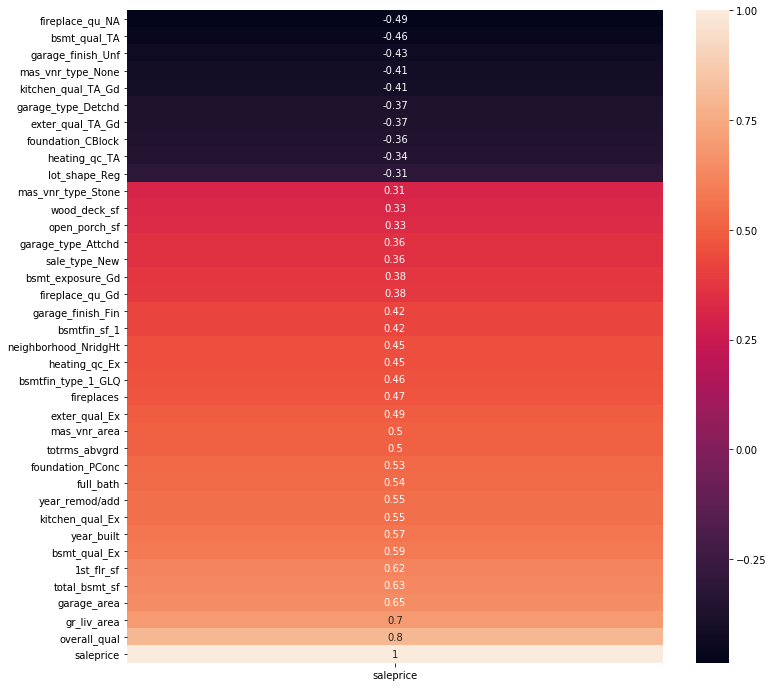

In [22]:
# After cleaning and filtering these are the features I've choosen
plt.figure(figsize=(12,12))
sns.heatmap(df_corr.corr()[['saleprice']].sort_values('saleprice'), annot=True)

In [23]:
def subplot_scatter(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    ax = ax.ravel()
    if len(list_of_columns) %2 != 0:
        ax[len(list_of_columns)].set_visible(False)
    for i in range(len(list_of_columns)):
        sns.scatterplot(dataframe[list_of_columns[i]], dataframe[list_of_titles[i]], ax=ax[i], alpha='auto')
        ax[i].set_title(f"{list_of_columns[i]} Vs {list_of_titles[i]}", fontsize=20 )
        ax[i].set_ylabel(list_of_titles[i], fontsize=15)
        ax[i].set_xlabel(list_of_columns[i], fontsize=15)
    plt.tight_layout()

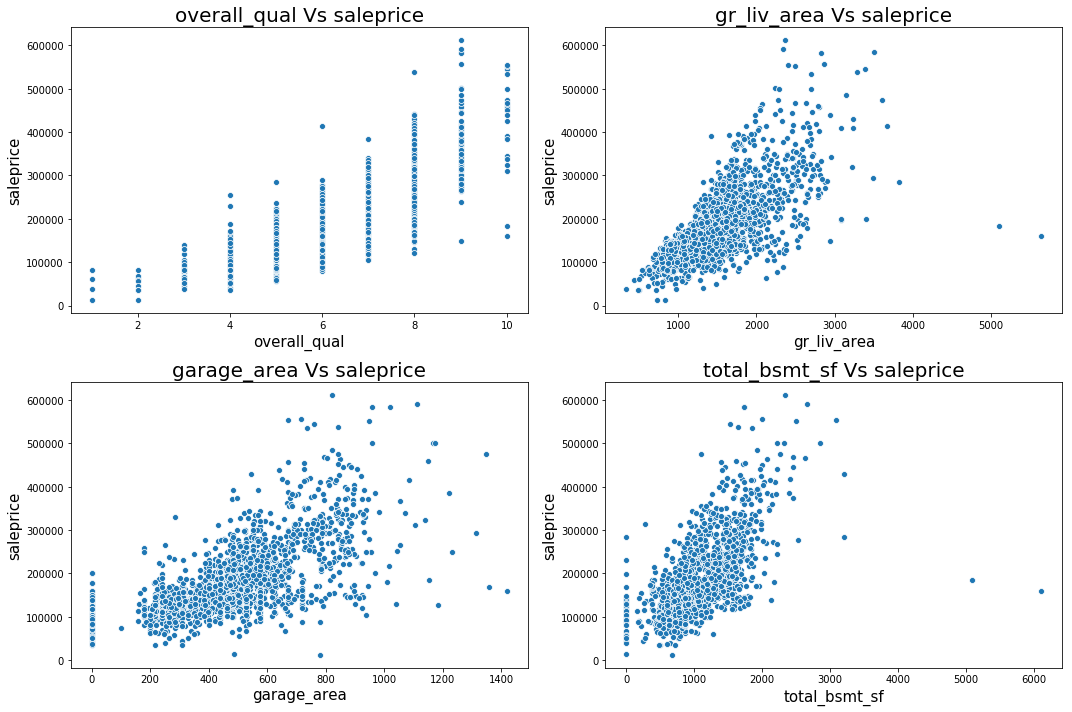

In [24]:
subplot_scatter(df_dummies, ['overall_qual', 'gr_liv_area', 'garage_area',
       'total_bsmt_sf'],['saleprice','saleprice','saleprice','saleprice'])

**Heatmap**
- These are the final features that will move on to our modeling step. This is a visual check of what is above correlation of 0.3 to our target saleprice. 

**Scatterplot**
- I selected to top 4 features that are highly correlated to my target and plot them into scatterplot to make sure if there's any linear relationship to our sale prices. In conclusion, we do have linear relationship to the saleprice; however, this isn't the final features that will be our top 4. 

In [25]:
# save my cleaned data to new csv
df_dummies.to_csv('../datasets/df_dummies.csv')

## Set up `X` and `y`

In [26]:
# set our X and y variable
X = df_dummies[['overall_qual', 'gr_liv_area', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'bsmt_qual_Ex', 'year_built',
       'kitchen_qual_Ex', 'year_remod/add', 'full_bath', 'foundation_PConc',
       'totrms_abvgrd', 'mas_vnr_area', 'exter_qual_Ex', 'fireplace_qu_NA',
       'fireplaces', 'bsmtfin_type_1_GLQ', 'bsmt_qual_TA', 'heating_qc_Ex',
       'neighborhood_NridgHt', 'garage_finish_Unf', 'bsmtfin_sf_1',
       'garage_finish_Fin', 'mas_vnr_type_None', 'kitchen_qual_TA_Gd',
       'fireplace_qu_Gd', 'bsmt_exposure_Gd', 'garage_type_Detchd',
       'exter_qual_TA_Gd', 'sale_type_New', 'garage_type_Attchd',
       'foundation_CBlock', 'heating_qc_TA', 'open_porch_sf', 'wood_deck_sf',
       'mas_vnr_type_Stone', 'lot_shape_Reg']]
y = df_dummies['saleprice']

## Create training and validation sets the data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420)

In [28]:
threshold = VarianceThreshold(.01)
X_train_thresh = threshold.fit_transform(X_train)
X_test_thresh = threshold.transform(X_test)
columns = X.columns[threshold.get_support()]

**What does train_test_split do?**
- Tran_test_split splits arrays or matrices into random train and test subsets, in this case it splits X which is the variables we choose and y which is our target into random train and test subsets. The random state was set to 420 to make sure we will get the same result if we re-ran the function.

**What does VarianceThreshold do?**
- Variance Threshold is a feature selector that removes all low-variance features. meaning it will remove a low-variance features from our X that we manually selected.

## Scale the data

In [29]:
ss = StandardScaler()
ss.fit(X_train_thresh)

X_train_sc = ss.transform(X_train_thresh)
X_test_sc = ss.transform(X_test_thresh)

- Standard Scaler Standardize our features by removing the mean and scaling to unit variance. 

## Export my data and scaler for use in future notebooks


In [30]:
with open('../datasets/X_train_sc.csv', 'w+') as f:
    csv_writer = csv.writer(f)
    csv_writer.writerows(X_train_sc)

In [31]:
with open('../datasets/X_test_sc.csv', 'w+') as f:
    csv_writer = csv.writer(f)
    csv_writer.writerows(X_test_sc)

In [32]:
y_train.to_csv('../datasets/y_train.csv', index=False, header=False)

In [33]:
y_test.to_csv('../datasets/y_test.csv', index=False, header=False)

## Pickle the scaler

In [34]:
with open('../assets/scaler.pkl', 'wb+') as f:
    pickle.dump(ss, f)

In [35]:
with open('../assets/columns.pkl', 'wb+') as f:
    pickle.dump(columns, f)

In [1]:
columns

NameError: name 'columns' is not defined